# <u>PRACTICAL - 1</u>

## <u>QUESTION</u> - 

### Perform partitioning, hierarchical, and density-based clustering algorithms on a downloaded dataset and evaluate the cluster quality by changing the algorithm's parameters.

### <u>DATASET 1</u> -> Clustering Penguins Species (https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data)

### <u>DATASET 2</u> -> Weather Type Classification (https://www.kaggle.com/datasets/nikhil7280/weather-type-classification/data)

In [1]:
# Import Libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import category_encoders as ce

In [2]:
# Import Dataset 1 and 2

df1=pd.read_csv("penguins.csv")
df2=pd.read_csv("weather_classification_data.csv")

In [3]:
# Dataset 1

df1.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df1.shape

(344, 5)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [6]:
# Dataset 2

df2.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [7]:
df2.shape

(13200, 11)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


#### UNIQUE VALUES

In [9]:
# Dataset 1

d = []
u = []
t = []
for col in df1:
    d.append(col)
    u.append(df1[col].nunique())
    t.append(df1[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

,column,type,unique value
0,culmen_length_mm,float64,164
1,culmen_depth_mm,float64,80
2,flipper_length_mm,float64,57
3,body_mass_g,float64,94
4,sex,object,3


In [10]:
df1['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [11]:
# Dataset 2

d = []
u = []
t = []
for col in df2:
    d.append(col)
    u.append(df2[col].nunique())
    t.append(df2[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

,column,type,unique value
0,Temperature,float64,126
1,Humidity,int64,90
2,Wind Speed,float64,97
3,Precipitation (%),float64,110
4,Cloud Cover,object,4
5,Atmospheric Pressure,float64,5456
6,UV Index,int64,15
7,Season,object,4
8,Visibility (km),float64,41
9,Location,object,3


In [12]:
# Target(CLASS) Label

df2['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

####  EXPLORATORY DATA ANALYSIS (PREPROCESSING AND DATASET CLEANING)

In [13]:
# Handling Missing Values (Dataset 1)

df1.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [14]:
df1.dropna(inplace=True)

In [15]:
df1.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [17]:
# Dataset 2

df2.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [18]:
# Duplicate Values (Dataset 1)

df1.duplicated().sum()

0

In [19]:
# Dataset 2

df2.duplicated().sum()

0

#### SUMMARY STATISTICS

In [20]:
# Dataset 1

df1.describe(include='object')

,sex
count,335
unique,3
top,MALE
freq,169


In [21]:
df1.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


In [22]:
# Dataset 2

df2.describe(include='object')

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


In [23]:
df2.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [24]:
# Detecting Outliers (Dataset 1)

def boxplots(df1):
    cols = df1.columns[::]
    n = 2
    m = 3
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(20,15))
    for idx, col in enumerate(cols):
        i = idx // m
        j = idx % m
        if df1[col].dtype == 'object':
            sns.countplot(data=df1, x=col, ax=axes[i][j])
        else:
            sns.boxplot(data=df1, x=col, ax=axes[i][j])
    plt.tight_layout()
    plt.show()


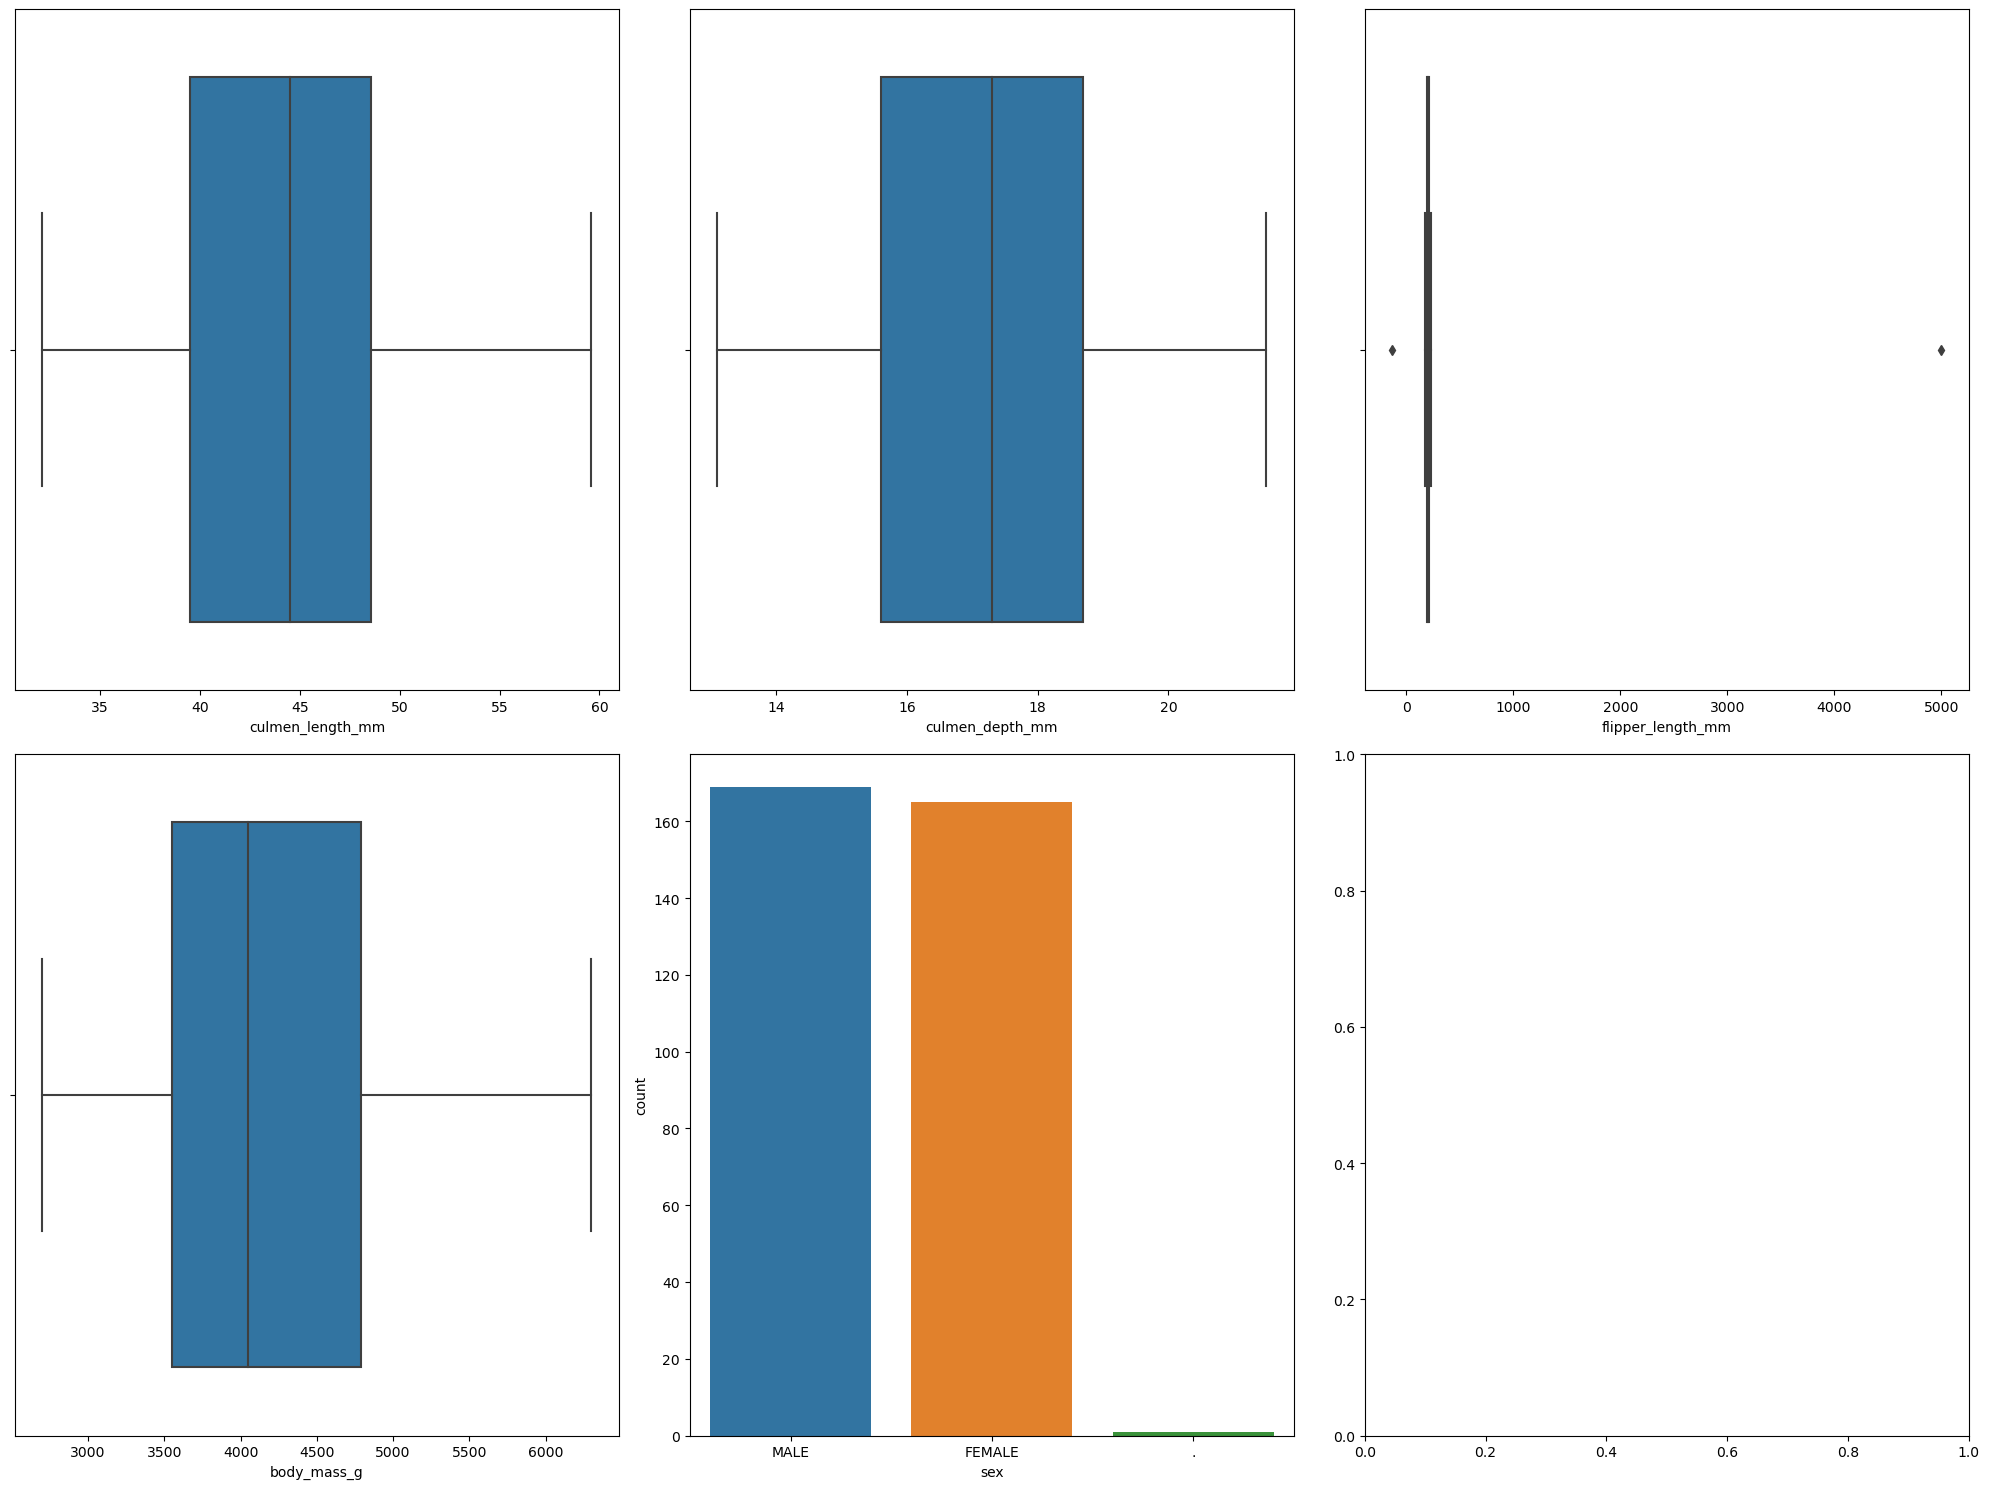

In [25]:
boxplots(df1)

In [26]:
# Fixing Outliers (Dataset 1)

def outliers_removal(df1, col):
    if df1[col].dtype != 'object':
        perc = np.percentile(df1[col], [0, 25, 50, 75, 100])
        iqr = perc[3] - perc[1]
        _min = perc[1] - 1.5*iqr
        _max = perc[3] + 1.5*iqr
        df1.loc[df1[col] > _max, col] = _max
        df1.loc[df1[col] < _min, col] = _min
    return df1
for col in df1.columns[::]:
    df1 = outliers_removal(df1, col)

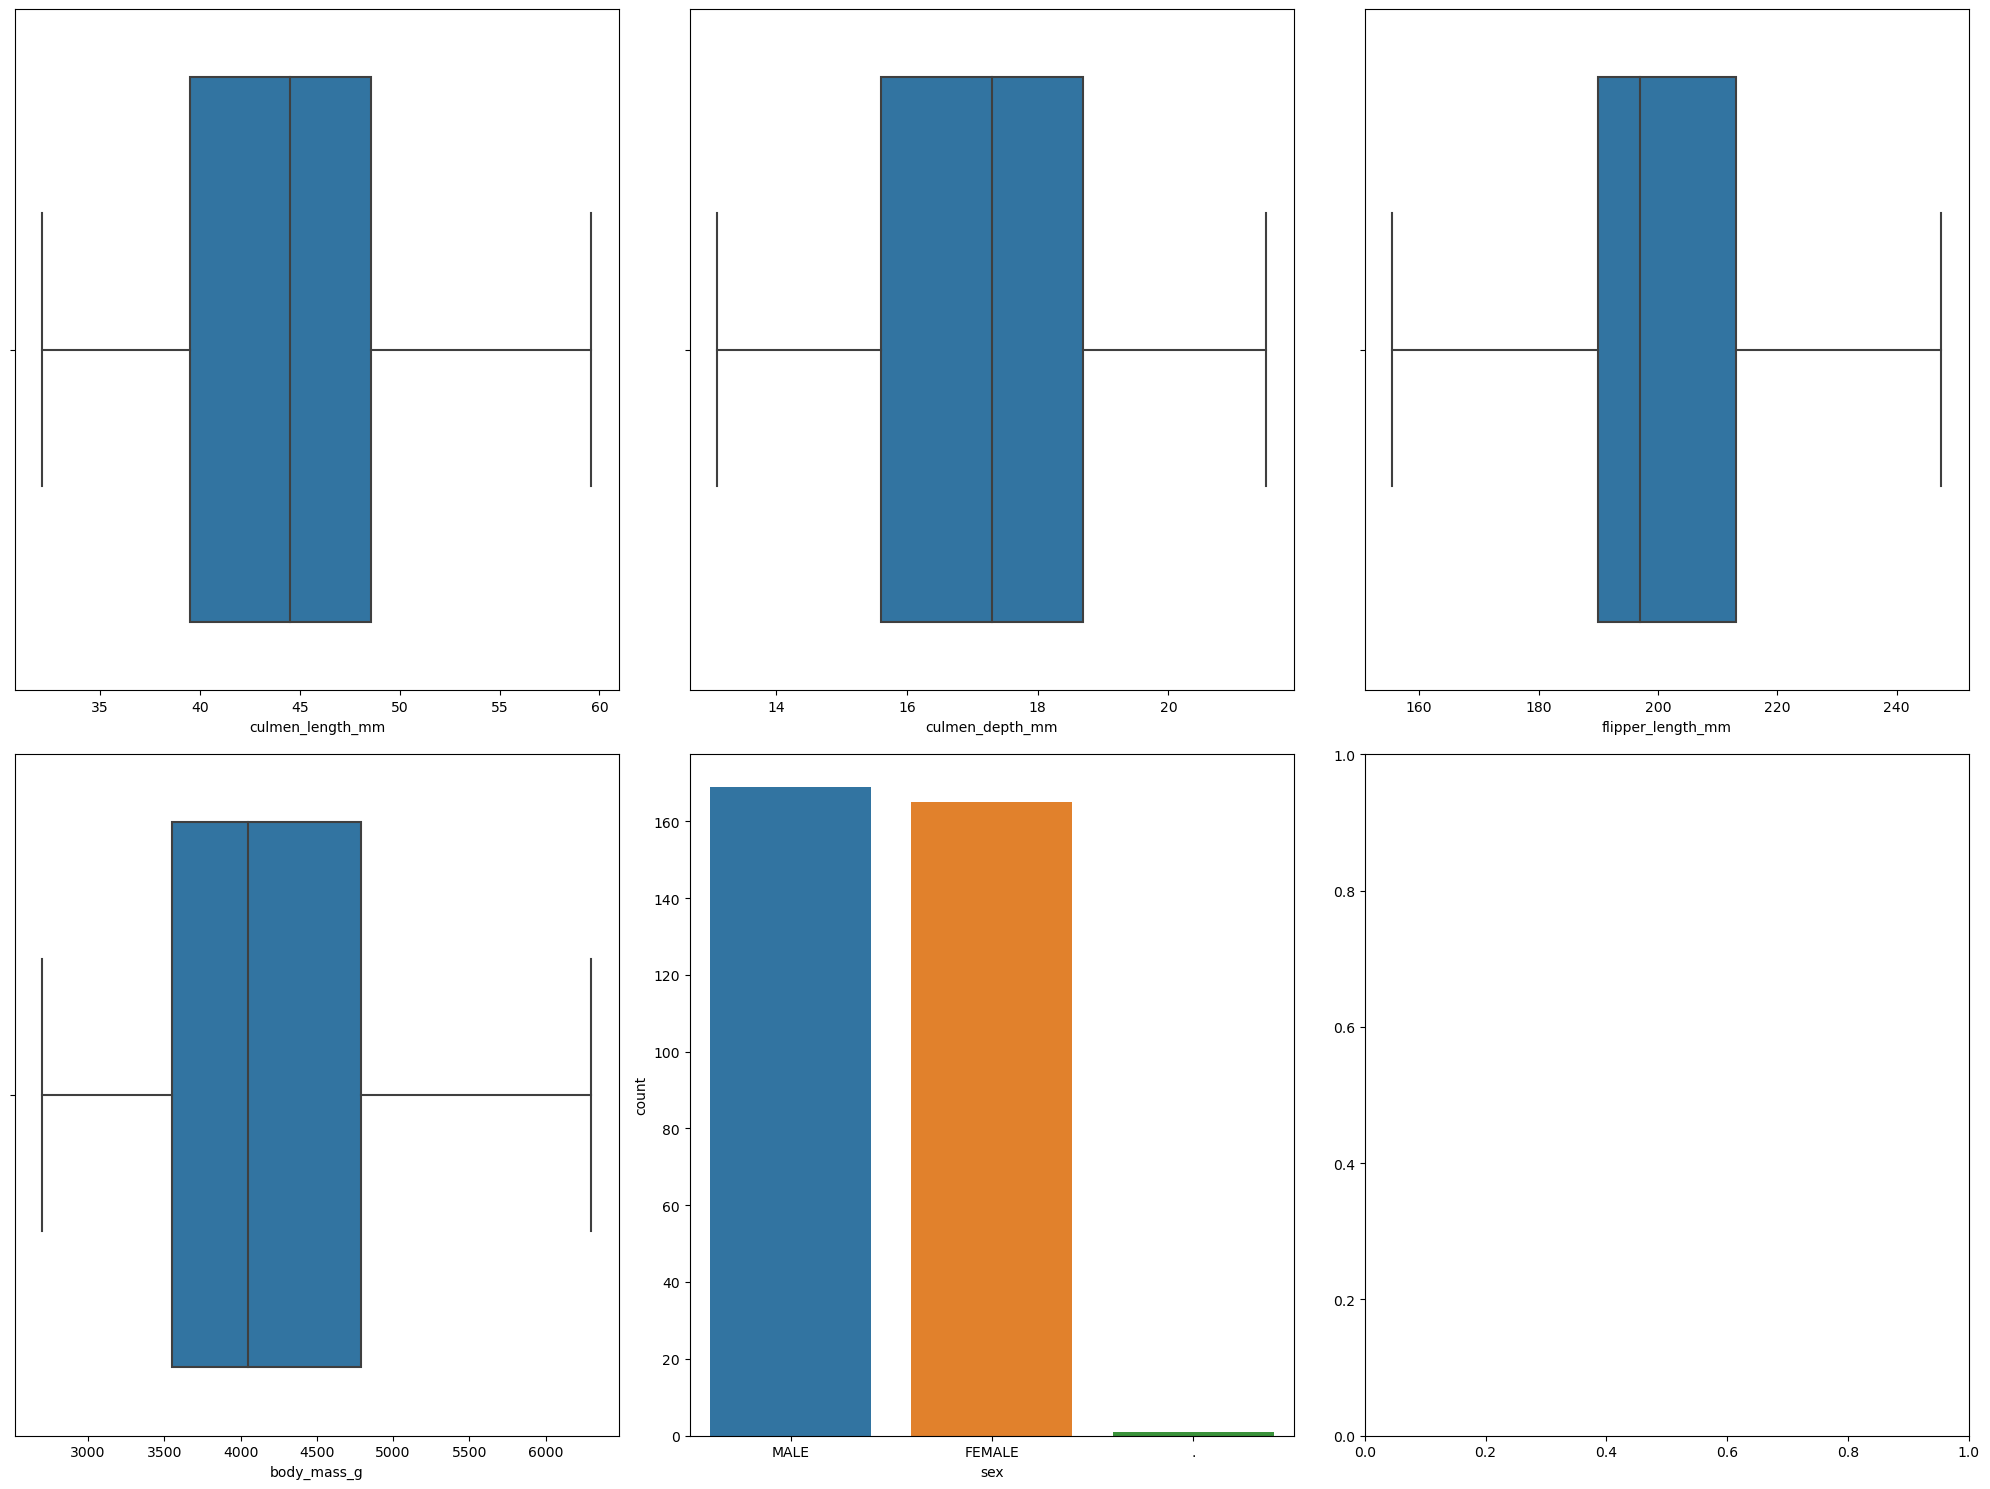

In [27]:
boxplots(df1)

In [28]:
# Dataset 2

def boxplots(df2):
    cols = df2.columns[::]
    n = 2
    m = 6
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(20,15))
    for idx, col in enumerate(cols):
        i = idx // m
        j = idx % m
        if df2[col].dtype == 'object':
            sns.countplot(data=df2, x=col, ax=axes[i][j])
        else:
            sns.boxplot(data=df2, x=col, ax=axes[i][j])
    plt.tight_layout()
    plt.show()


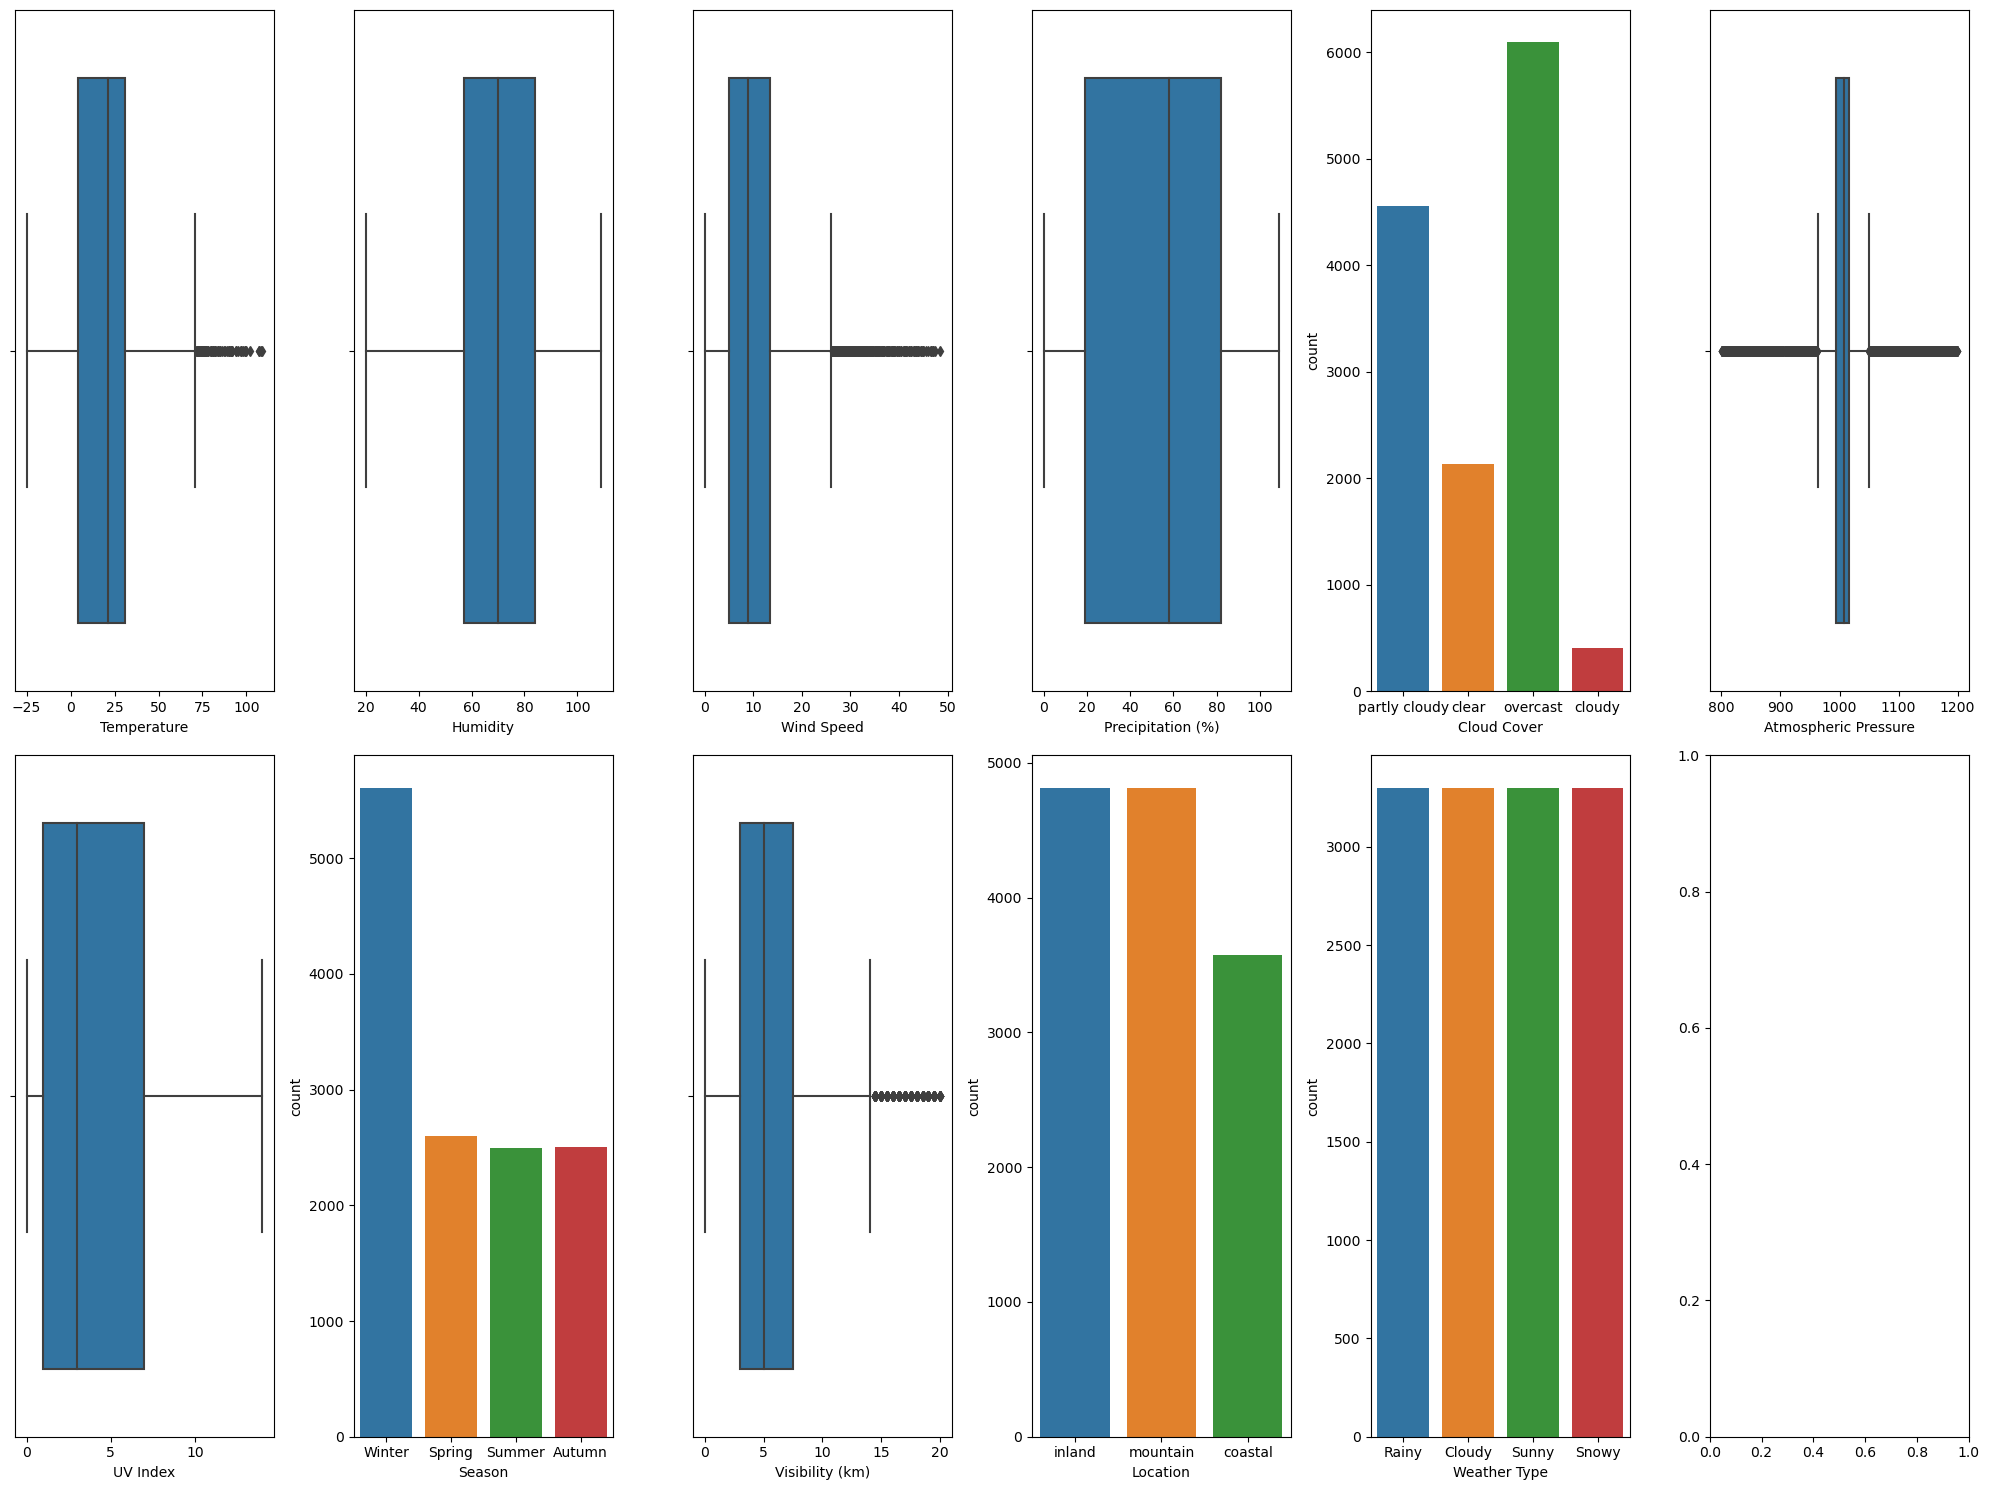

In [29]:
boxplots(df2)

In [30]:
def outliers_removal(df2, col):
    if df2[col].dtype != 'object':
        perc = np.percentile(df2[col], [0, 25, 50, 75, 100])
        iqr = perc[3] - perc[1]
        _min = perc[1] - 1.5*iqr
        _max = perc[3] + 1.5*iqr
        df2.loc[df2[col] > _max, col] = _max
        df2.loc[df2[col] < _min, col] = _min
    return df2
for col in df2.columns[::]:
    df2 = outliers_removal(df2, col)

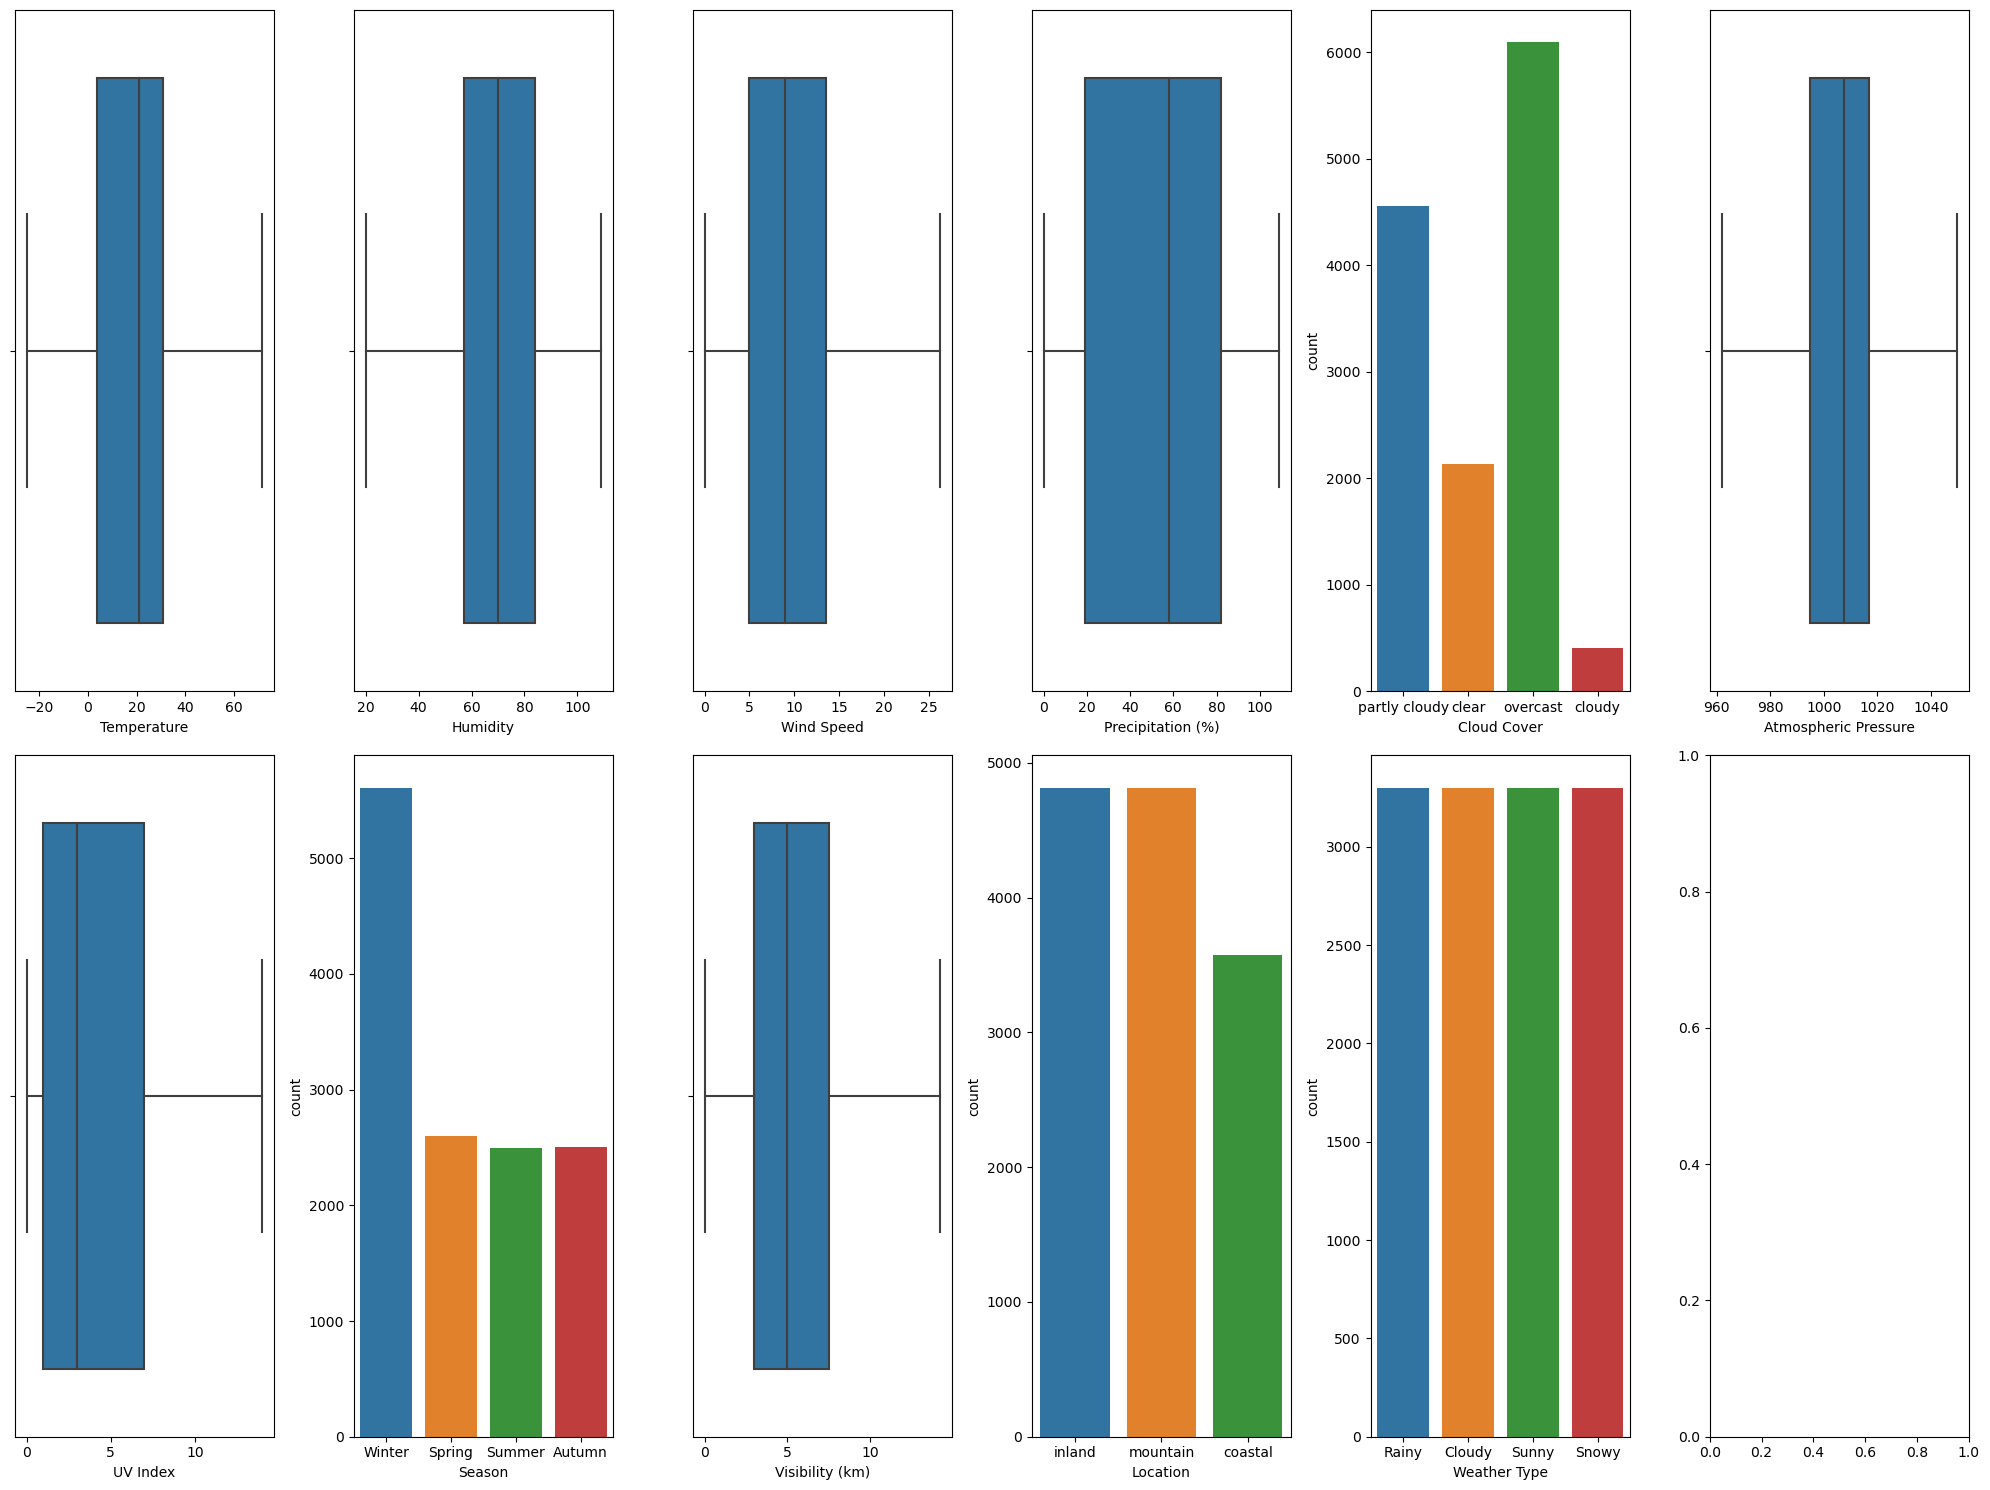

In [31]:
boxplots(df2)

#### EXPLORING CATEGORICAL FEATURES

In [32]:
# Dataset 1

categorical1 = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variable(s) in the 1st dataset\n'.format(len(categorical1)))
print('The categorical variable(s) are :\n\n', categorical1)

There are 1 categorical variable(s) in the 1st dataset

The categorical variable(s) are :

 ['sex']


In [33]:
# Dataset 2

categorical2 = [var for var in df2.columns if df2[var].dtype=='O']
print('There are {} categorical variable(s) in the 2nd dataset\n'.format(len(categorical2)))
print('The categorical variable(s) are :\n\n', categorical2)

There are 4 categorical variable(s) in the 2nd dataset

The categorical variable(s) are :

 ['Cloud Cover', 'Season', 'Location', 'Weather Type']


####  VISUALIZATION

#### HEATMAP

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.229465,0.643585,0.588891
culmen_depth_mm,-0.229465,1.000000,-0.561680,-0.471071
flipper_length_mm,0.643585,-0.561680,1.000000,0.844736
body_mass_g,0.588891,-0.471071,0.844736,1.000000


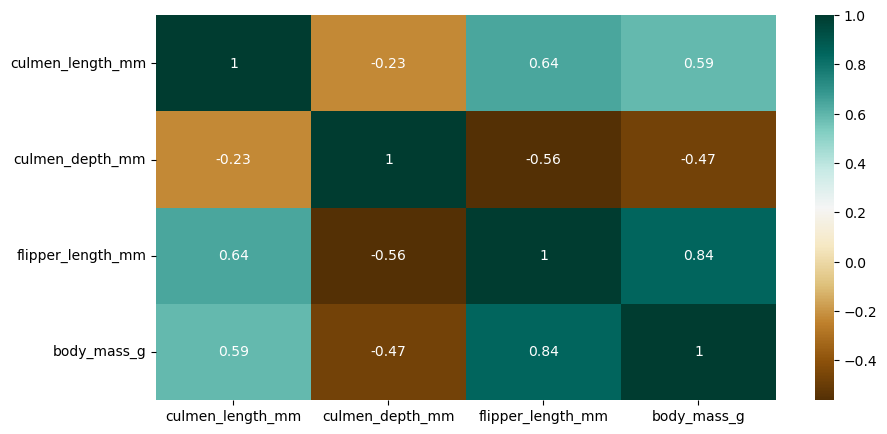

In [34]:
# Dataset 1

plt.figure(figsize=(10,5))
c1= df1.corr()
sns.heatmap(c1,cmap="BrBG",annot=True)
c1

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
Temperature,1.000000,-0.216058,-0.081095,-0.297124,0.448378,0.376705,0.283952
Humidity,-0.216058,1.000000,0.416197,0.638631,-0.288029,-0.342694,-0.496626
Wind Speed,-0.081095,0.416197,1.000000,0.456561,-0.177171,-0.099859,-0.338126
Precipitation (%),-0.297124,0.638631,0.456561,1.000000,-0.378186,-0.291601,-0.498311
Atmospheric Pressure,0.448378,-0.288029,-0.177171,-0.378186,1.000000,0.323419,0.309709
UV Index,0.376705,-0.342694,-0.099859,-0.291601,0.323419,1.000000,0.371790
Visibility (km),0.283952,-0.496626,-0.338126,-0.498311,0.309709,0.371790,1.000000


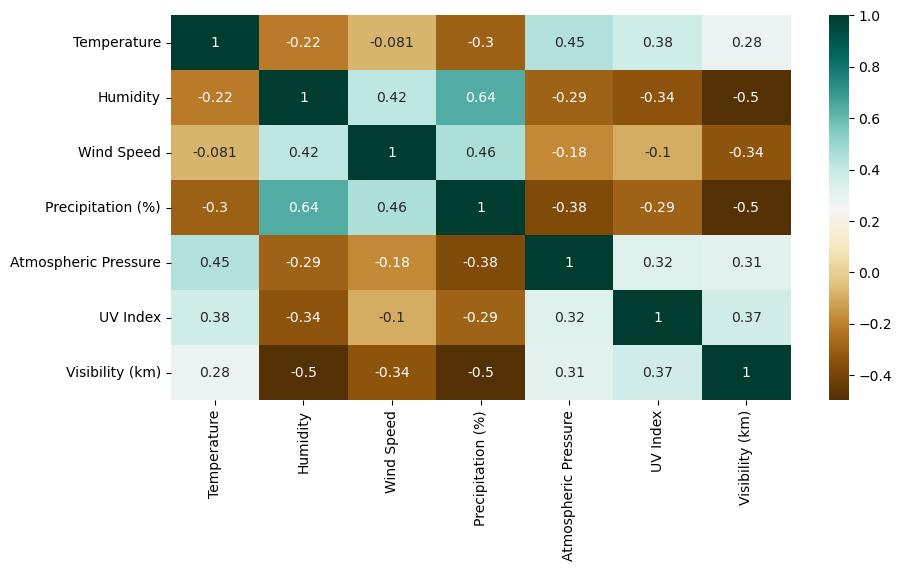

In [35]:
# Dataset 2

plt.figure(figsize=(10,5))
c2= df2.corr()
sns.heatmap(c2,cmap="BrBG",annot=True)
c2

#### ENCODING

In [36]:
# Dataset 1

encoder=ce.OneHotEncoder(cols=categorical1)
df1=encoder.fit_transform(df1)
print('All features of Dataset-1 are now Numerical!')

All features of Dataset-1 are now Numerical!


In [37]:
df1.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_1,sex_2,sex_3
0,39.1,18.7,181.0,3750.0,1,0,0
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,1,0,0


#### DECLARE FEATURE VECTOR, TARGET VARIABLE & ENCODING 

In [38]:
# Dataset 2

df_2=df2.copy()
X=df_2.iloc[:,:-1]
y=df_2.iloc[:,-1] # Target (CLASS) Label

In [39]:
y=pd.DataFrame(y, columns=['Weather Type'])

In [40]:
le=LabelEncoder()
for col in categorical2[:-1]:
    X[col]=le.fit_transform(X[col])
y['Weather Type']= le.fit_transform(y['Weather Type'])

#### FEATURE SCALING

In [41]:
# Dataset 1

scaling=StandardScaler()
df_scaled=scaling.fit_transform(df1)
df1=pd.DataFrame(df_scaled, columns=df1.columns)

In [42]:
df1.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_1,sex_2,sex_3
0,-0.897723,0.777263,-1.388431,-0.572233,0.991085,-0.985184,-0.054718
1,-0.824265,0.117037,-1.041789,-0.509923,-1.008996,1.015038,-0.054718
2,-0.677349,0.421757,-0.417833,-1.195338,-1.008996,1.015038,-0.054718
3,-1.338472,1.081983,-0.556490,-0.946096,-1.008996,1.015038,-0.054718
4,-0.860994,1.742210,-0.764475,-0.696854,0.991085,-0.985184,-0.054718


In [43]:
# Dataset 2

cols = X.columns
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

In [44]:
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0.404145,0.595506,0.361905,0.752294,1.000000,0.557273,0.142857,1.000000,0.245614,0.5
1,0.663212,0.853933,0.323810,0.651376,1.000000,0.564214,0.500000,0.333333,0.701754,0.5
2,0.569948,0.494382,0.266667,0.146789,0.000000,0.647158,0.357143,0.333333,0.385965,1.0
3,0.652850,0.707865,0.057143,0.752294,0.000000,0.732834,0.500000,0.333333,0.070175,0.0
4,0.538860,0.606742,0.647619,0.605505,0.666667,0.328009,0.071429,1.000000,0.175439,1.0


#### K-MEANS CLUSTERING ALGORITHM (PARTITIONAL CLUSTERING)

In [45]:
# Dataset 1

# Feature Selection for the Model
# Considering 2 Features 'culmen_length_mm' and 'culmen_depth_mm'

X1=df1.loc[:,['culmen_length_mm','culmen_depth_mm']].values

#### ELBOW METHOD

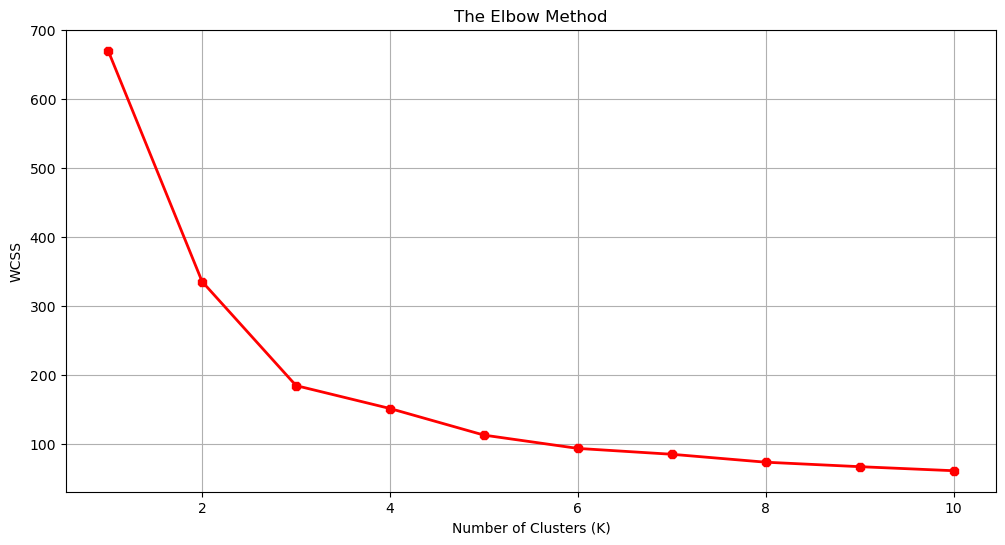

In [46]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++',random_state=50)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker='8')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [47]:
# Silhouette Analysis

# The value of the silhouette score range lies between -1 to 1.
# A score closer to 1 indicates that the data point is very similar to other data points in the cluster
# A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X1)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4730333600660573
For n_clusters=3, the silhouette score is 0.5209284831376417
For n_clusters=4, the silhouette score is 0.4365773994940177
For n_clusters=5, the silhouette score is 0.3953438171781385
For n_clusters=6, the silhouette score is 0.4015884978533916
For n_clusters=7, the silhouette score is 0.3928471555801646
For n_clusters=8, the silhouette score is 0.40898585670014953


In [48]:
# Model Building

kmeans=KMeans(n_clusters=3, init='k-means++', random_state=50)
label=kmeans.fit_predict(X1)
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 1 0 1 0 0 2 0 0
 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 1 0 2 0 0 0 0 2 2 0 1 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [49]:
# Converting X1 to a Dataframe with 'cluster'

X1_df=pd.DataFrame(X1, columns=['culmen_length_mm', 'culmen_depth_mm'])

In [50]:
X1_df['cluster']=label
X1_df.head()

,culmen_length_mm,culmen_depth_mm,cluster
0,-0.897723,0.777263,1
1,-0.824265,0.117037,1
2,-0.677349,0.421757,1
3,-1.338472,1.081983,1
4,-0.860994,1.742210,1


In [51]:
X1_df.tail()

,culmen_length_mm,culmen_depth_mm,cluster
330,0.589802,-1.762070,2
331,0.516344,-1.457350,2
332,1.177467,-0.746337,2
333,0.222512,-1.203417,2
334,1.085644,-0.543190,2


In [52]:
# Centroids

print(kmeans.cluster_centers_)

[[ 1.08112384  0.77882603]
 [-0.94813325  0.55741505]
 [ 0.58676698 -1.10478128]]


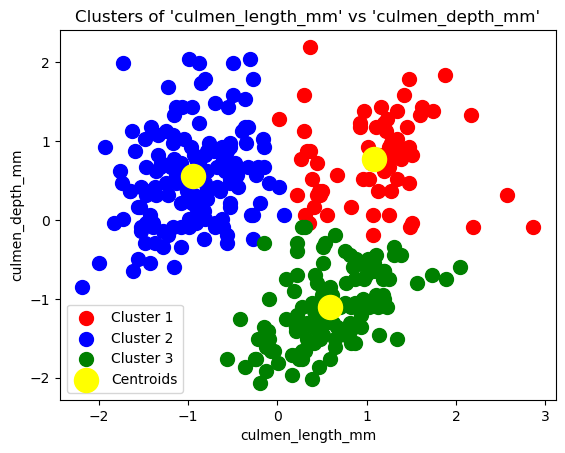

In [53]:
# Scatter Plot for 'culmen_length_mm' vs 'culmen_depth_mm'

plt.scatter(X1[label == 0, 0], X1[label == 0, 1], s = 100, c = 'red', label ='Cluster 1')
plt.scatter(X1[label == 1, 0], X1[label == 1, 1], s = 100, c = 'blue', label ='Cluster 2')
plt.scatter(X1[label == 2, 0], X1[label == 2, 1], s = 100, c = 'green', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s =300, c = 'yellow', label = 'Centroids')
plt.title("Clusters of 'culmen_length_mm' vs 'culmen_depth_mm'")
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.legend()
plt.show()

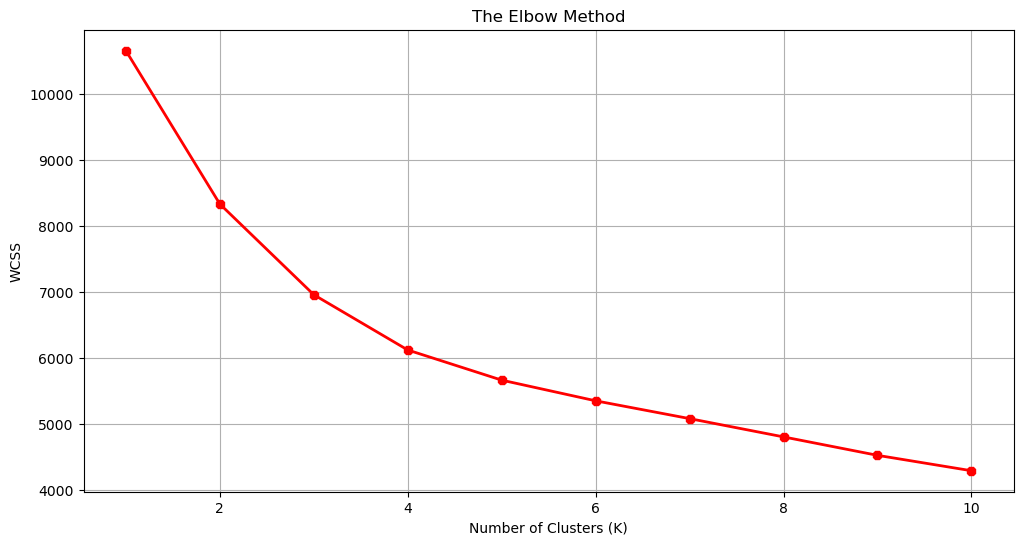

In [54]:
# DATASET 2 

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker='8')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [55]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.21532335930248295
For n_clusters=3, the silhouette score is 0.23067221025129006
For n_clusters=4, the silhouette score is 0.2200958738990719
For n_clusters=5, the silhouette score is 0.2276900572522472
For n_clusters=6, the silhouette score is 0.22842026868172993
For n_clusters=7, the silhouette score is 0.2190016817348787
For n_clusters=8, the silhouette score is 0.19129632370386707


In [56]:
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=0)
label=kmeans.fit_predict(X)

In [57]:
print(classification_report(y,label))

              precision    recall  f1-score   support

           0       0.45      0.71      0.55      3300
           1       0.03      0.02      0.03      3300
           2       0.54      0.92      0.68      3300
           3       0.00      0.00      0.00      3300

    accuracy                           0.41     13200
   macro avg       0.26      0.41      0.31     13200
weighted avg       0.26      0.41      0.31     13200



In [58]:
def purity_score(y_true, y_pred):
    confusion_matrix = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

In [59]:
purity1=purity_score(y, label)
print(f"The purity score is {round(purity1*100, 2)}%")

The purity score is 57.11%


#### New Parameters

In [60]:
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=0)
label=kmeans.fit_predict(X)

In [61]:
print(classification_report(y,label))

              precision    recall  f1-score   support

           0       0.38      0.33      0.35      3300
           1       0.31      0.32      0.31      3300
           2       0.03      0.02      0.02      3300
           3       0.02      0.03      0.03      3300

    accuracy                           0.17     13200
   macro avg       0.19      0.17      0.18     13200
weighted avg       0.19      0.17      0.18     13200



In [62]:
purity2=purity_score(y, label)
print(f"The purity score is {round(purity2*100, 2)}%")

The purity score is 59.62%


#### HIERARCHICAL CLUSTERING ALGORITHM (AGGLOMERATIVE)

In [63]:
# Dataset 1
# Principal Component Analysis

pca=PCA(n_components=2)
pca.fit(df1)
x_pca=pca.transform(df1)

In [64]:
x_pca.shape

(335, 2)

In [65]:
df1.shape

(335, 7)

Text(0, 0.5, 'Euclidean Distance')

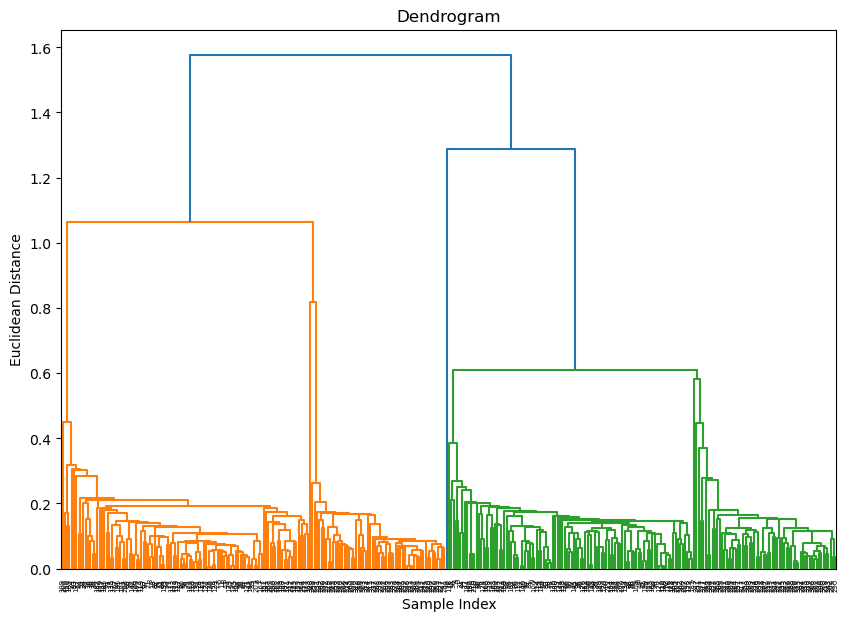

In [66]:
# Creating Dendrogram using Scaled PCA Data ('single link')

plt.figure(figsize=(10,7))
dend=shc.dendrogram(shc.linkage(x_pca, method='single'))
plt.title("Dendrogram")
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')

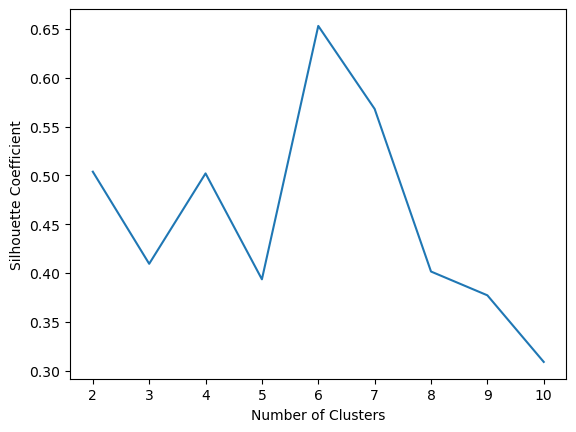

In [67]:
silhouette_coefficients=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='single')
    agglo.fit(x_pca)
    score=silhouette_score(x_pca, agglo.labels_)
    silhouette_coefficients.append(score)

# Plotting No. of Clusters Vs Silhouette Coefficient

plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [68]:
# From the above plot, we note that Silhouette Coefficient is Higher for clusters=6

cluster=AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='single')
labels_=cluster.fit_predict(x_pca)

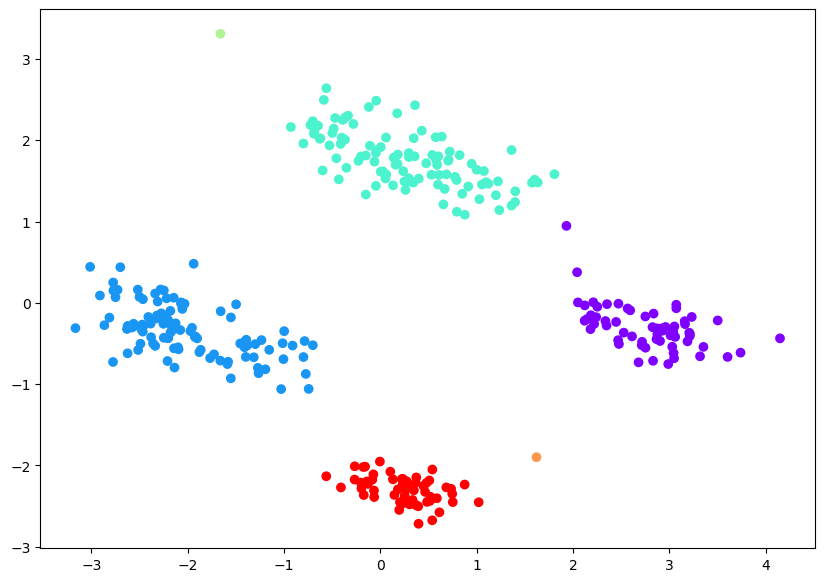

In [69]:
# Plot for No. of Clusters=6 and Linkage='single'

plt.figure(figsize=(10,7))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cluster.labels_, cmap='rainbow')

In [70]:
# Dataset 2

pca=PCA(n_components=2)
pca.fit(X)
x_pca2=pca.transform(X)

In [71]:
x_pca2.shape

(13200, 2)

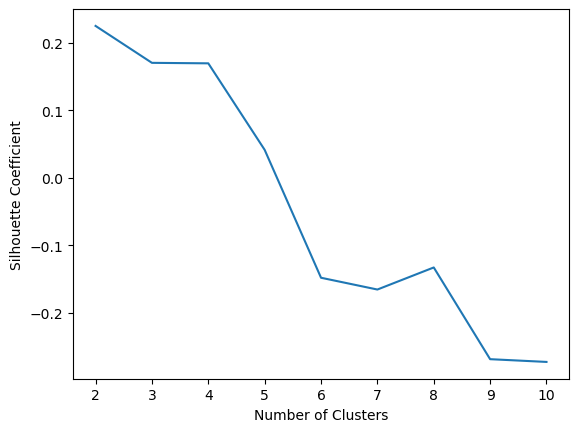

In [72]:
silhouette_coefficients=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='single')
    agglo.fit(x_pca2)
    score=silhouette_score(x_pca2, agglo.labels_)
    silhouette_coefficients.append(score)


# Plotting No. of Clusters VS Silhouette Coefficient

plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [73]:
# From the above plot, we note that Silhouette Coefficient is Higher for Clusters=2

cluster=AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='single')
labels_=cluster.fit_predict(x_pca2)

In [74]:
# Purity (Dataset 2 -> single link, clusters=2)

purity3=purity_score(y,labels_)
print(f"The purity score is {round(purity3*100,2)}%")

The purity score is 25.01%


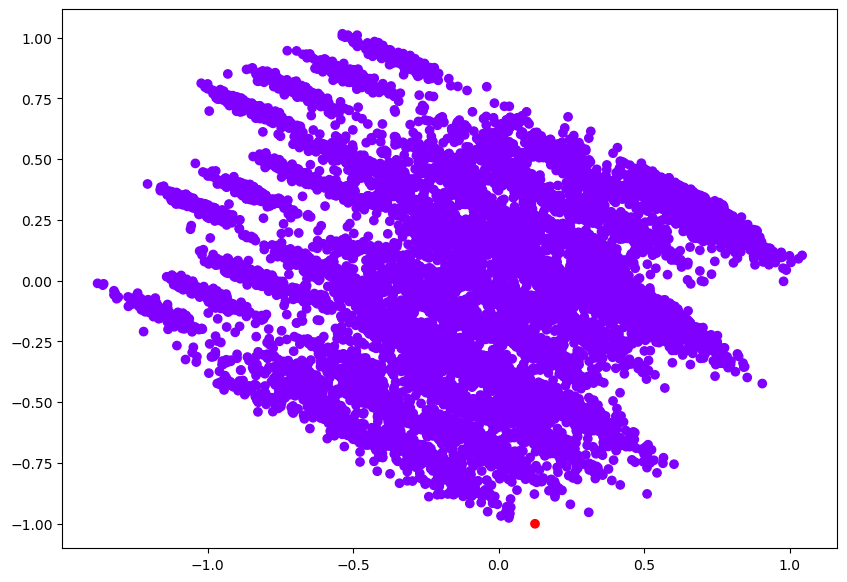

In [75]:
# Plot for No. of Clusters=2 and Linkage='single'

plt.figure(figsize=(10,7))
plt.scatter(x_pca2[:,0], x_pca2[:,1], c=cluster.labels_, cmap='rainbow')

#### New Parameters

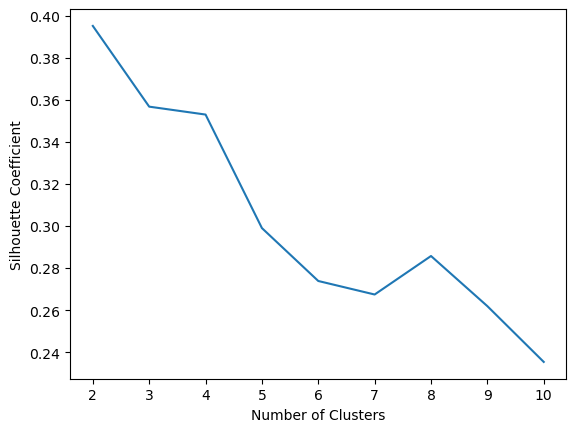

In [76]:
silhouette_coefficients=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='complete')
    agglo.fit(x_pca2)
    score=silhouette_score(x_pca2, agglo.labels_)
    silhouette_coefficients.append(score)

# Plotting No. of Clusters VS Silhouette Coefficient

plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [77]:
# From the above plot, we note that Silhouette Coefficient is Higher for Clusters=2

cluster=AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
labels_=cluster.fit_predict(x_pca2)

In [78]:
# Purity (Dataset 2-> complete link, clusters=2)

purity4=purity_score(y, labels_)
print(f"The purity score is {round(purity4*100, 2)}%")

The purity score is 44.37%


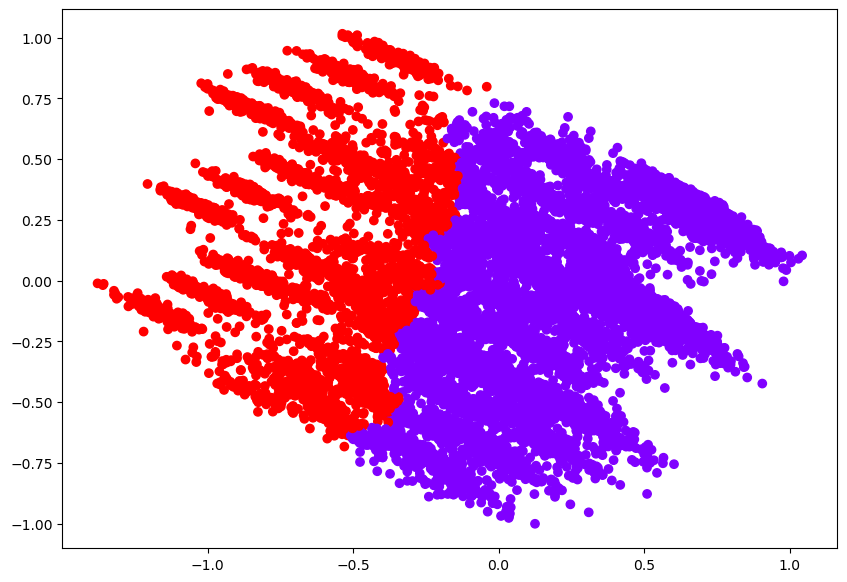

In [79]:
# PLOT FOR NO. OF CLUSTERS=2 AND LINKAGE='complete'

plt.figure(figsize=(10,7))
plt.scatter(x_pca2[:,0], x_pca2[:,1], c=cluster.labels_, cmap='rainbow')

#### DENSITY-BASED CLUSTERING ALGORITHM (DBSCAN)

In [80]:
# Dataset 1
# Selecting 3 columns 'culmen_depth_mm', 'flipper_length_mm' and 'body_mass_g' to Create X_train

X_train=df1[['culmen_depth_mm','flipper_length_mm','body_mass_g']]

In [81]:
# eps=1.5 and min_samples=105

clustering = DBSCAN(eps=1.5, min_samples=105).fit(X_train)
DBSCAN_dataset= X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
0,215
1,117
-1,3


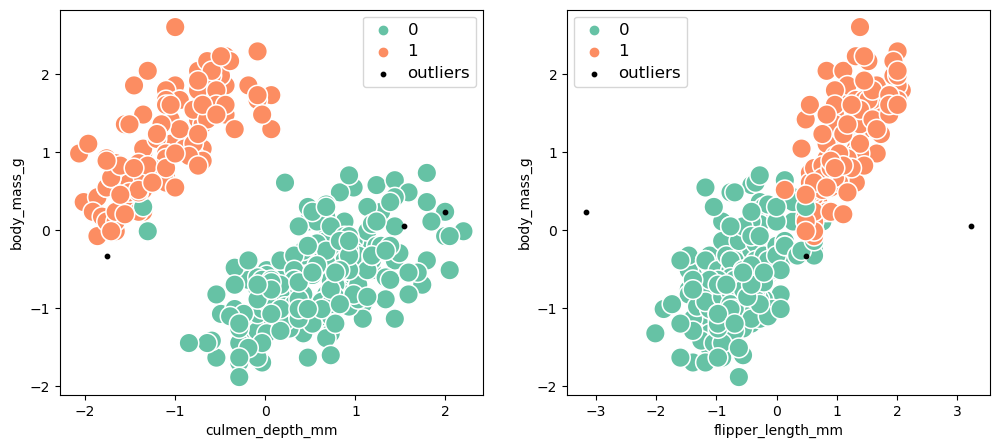

In [82]:
# Visualization

outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x='culmen_depth_mm', y='body_mass_g', data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],  
hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1], 
hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['culmen_depth_mm'], outliers['body_mass_g'], s=10, label='outliers', c="k")
axes[1].scatter(outliers['flipper_length_mm'], outliers['body_mass_g'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')
plt.show()

In [83]:
# Dataset 2

pca=PCA(n_components=2)
pca.fit(X)
x_pca3=pca.transform(X)

In [84]:
x_pca3=pd.DataFrame(x_pca3,columns=['col1','col2'])

In [85]:
# Computing Data Proximity from each other using nearest neighbors

neighb = NearestNeighbors(n_neighbors=2)
nbrs=neighb.fit(x_pca3)
distances,indices=nbrs.kneighbors(x_pca3)

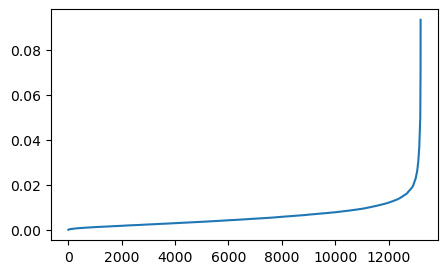

In [86]:
# Sorting and Plotting the distances between the data points

distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances) 
plt.show() 

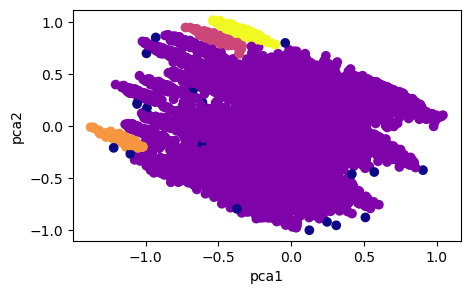

In [87]:
# From the above plot, we note the maximum curvature of the curve is about 0.05, and thus we picked our eps as 0.05
# Implementing the DBSCAN Model

dbscan = DBSCAN(eps = 0.05, min_samples = 4).fit(x_pca3)
labels = dbscan.labels_ 
plt.scatter(x_pca3.iloc[:, 0], x_pca3.iloc[:,1], c = labels, cmap= "plasma") 
plt.xlabel('pca1') 
plt.ylabel('pca2') 
plt.show() 

In [88]:
DBSCAN_dataset2= x_pca3.copy()
DBSCAN_dataset2.loc[:,'Cluster'] = labels 
DBSCAN_dataset2.Cluster.value_counts().to_frame()

,Cluster
0,12724
2,158
1,151
3,147
-1,20


In [89]:
# Purity (Dataset 2-> eps=0.05, min_samples=4)

purity5=purity_score(y,labels)
print(f"The purity score is {round(purity5*100,2)}%")

The purity score is 28.42%


#### New Parameters

In [90]:
dbscan = DBSCAN(eps = 0.05, min_samples = 5).fit(x_pca3)
labels = dbscan.labels_

In [91]:
# Purity (Dataset 2-> eps=0.05, min_samples=5)

purity6=purity_score(y,labels)
print(f"The purity score is {round(purity6*100,2)}%")

The purity score is 29.58%


#### PLOTTING PURITY SCORES

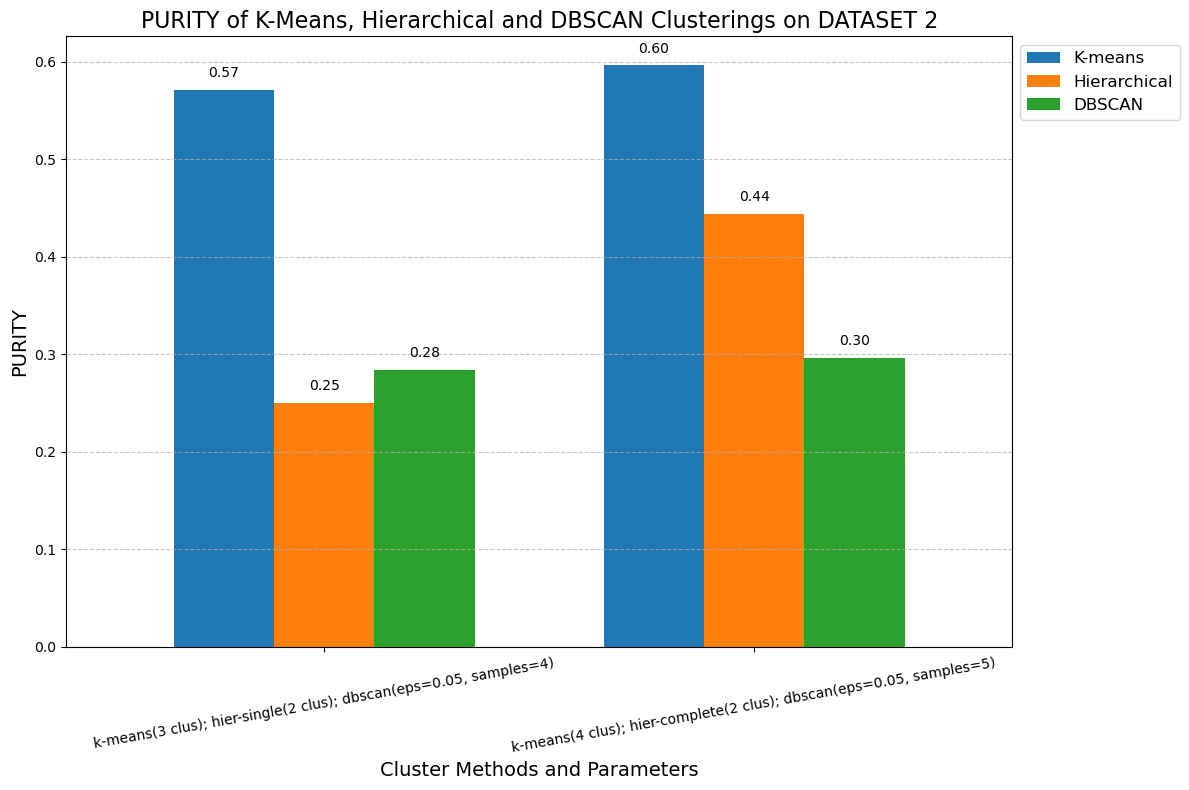

In [92]:
data1 = {'K-means': [purity1, purity2],
         'Hierarchical': [purity3, purity4],
         'DBSCAN': [purity5, purity6]}

_df1 = pd.DataFrame(data1, columns=['K-means', 'Hierarchical', 'DBSCAN'],
                    index=['k-means(3 clus); hier-single(2 clus); dbscan(eps=0.05, samples=4)', 
                           'k-means(4 clus); hier-complete(2 clus); dbscan(eps=0.05, samples=5)'])
fig, ax = plt.subplots(figsize=(12, 8))  
_df1.plot.bar(ax=ax, rot=10, color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.7)  

def addlabels(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0: 
            ax.annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height + 0.01), 
                        ha='center', va='bottom', fontsize=10)  

addlabels(ax)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.title("PURITY of K-Means, Hierarchical and DBSCAN Clusterings on DATASET 2", fontsize=16)
plt.xlabel("Cluster Methods and Parameters", fontsize=14)
plt.ylabel("PURITY", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

## THANK YOU